In [1]:
!pip install --upgrade google-cloud-language

Requirement already up-to-date: google-cloud-language in /Users/mils/anaconda3/lib/python3.6/site-packages
Requirement already up-to-date: google-auth<2.0dev,>=1.0.2 in /Users/mils/anaconda3/lib/python3.6/site-packages (from google-cloud-language)
Requirement already up-to-date: google-api-core[grpc]<0.2.0dev,>=0.1.1 in /Users/mils/anaconda3/lib/python3.6/site-packages (from google-cloud-language)
Requirement already up-to-date: six>=1.9.0 in /Users/mils/anaconda3/lib/python3.6/site-packages (from google-auth<2.0dev,>=1.0.2->google-cloud-language)
Requirement already up-to-date: rsa>=3.1.4 in /Users/mils/anaconda3/lib/python3.6/site-packages (from google-auth<2.0dev,>=1.0.2->google-cloud-language)
Requirement already up-to-date: pyasn1-modules>=0.2.1 in /Users/mils/anaconda3/lib/python3.6/site-packages (from google-auth<2.0dev,>=1.0.2->google-cloud-language)
Requirement already up-to-date: cachetools>=2.0.0 in /Users/mils/anaconda3/lib/python3.6/site-packages (from google-auth<2.0dev,>

In [2]:
import pandas as pd

In [3]:
from google.cloud import language
from google.cloud.language import enums
from google.cloud.language import types

# Instantiates a client
client = language.LanguageServiceClient()

# The text to analyze
text = u'Hello, world!'
document = types.Document(
    content=text,
    type=enums.Document.Type.PLAIN_TEXT)

# Detects the sentiment of the text
sentiment = client.analyze_sentiment(document=document).document_sentiment

print('Text: {}'.format(text))
print('Sentiment: {}, {}'.format(sentiment.score, sentiment.magnitude))

Text: Hello, world!
Sentiment: 0.30000001192092896, 0.30000001192092896


In [4]:
text = u'FUCK YOU'
document = types.Document(
    content=text,
    type=enums.Document.Type.PLAIN_TEXT)

sentiment = client.analyze_sentiment(document=document).document_sentiment

print('Text: {}'.format(text))
print('Sentiment: {}, {}'.format(sentiment.score, sentiment.magnitude))

Text: FUCK YOU
Sentiment: -0.6000000238418579, 0.6000000238418579


In [11]:
from os import listdir
from os.path import isfile, join
path = '/Users/mils/Projects/google_cloud_natural_language/lyrics'
lyrics_files = [f for f in listdir(path) if isfile(join(path, f))]

d = {'songs':[], 'scores': [], 'magnitudes': []}
songs = []
scores = []
magnitudes = []

for file_name in lyrics_files:
    file = f'{path}/{file_name}'
    with open(file, 'r') as lyrics:
        text = lyrics.readlines()
        text = str(text).strip('[]')
        document = types.Document(
            content=text,
            type=enums.Document.Type.PLAIN_TEXT
        )

        sentiment = client.analyze_sentiment(document=document).document_sentiment
        #print('Sentiment: {}, {}'.format(sentiment.score, sentiment.magnitude))
        songs.append(file_name.split('.txt')[0])
        scores.append(sentiment.score)
        magnitudes.append(sentiment.magnitude)

d['songs'] = songs
d['scores'] = scores
d['magnitudes'] = magnitudes

In [12]:
df = pd.DataFrame(data=d)
df

,magnitudes,scores,songs
0,2.0,0.3,afire_love
1,0.7,0.2,all_of_the_stars
2,1.0,-0.3,bloodstream
3,1.8,-0.2,dont
4,1.1,0.5,english_rose
5,0.4,0.2,even_my_dad_does_sometimes
6,0.8,0.0,i_see_fire
7,1.5,0.0,im_a_mess
8,0.9,0.2,lay_it_all_on_me
9,0.6,0.0,make_it_rain


In [13]:
from matplotlib import pyplot as plt
import seaborn as sns

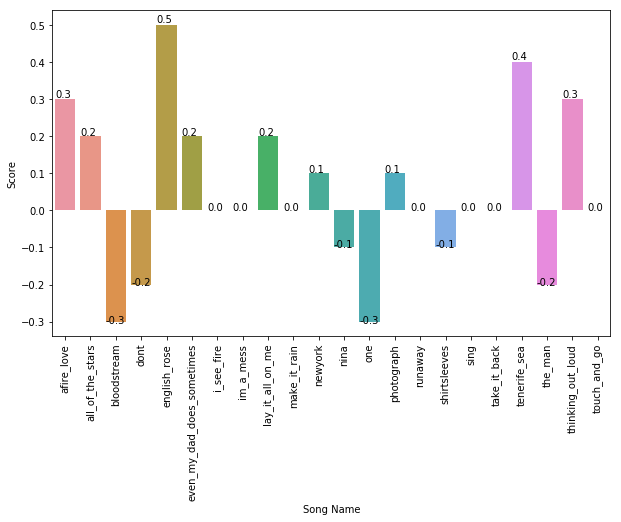

In [14]:
plt.figure(figsize=(10, 6))
palette = sns.set_palette('husl')
df.scores = df.scores.round(2)
g = sns.barplot(x='songs', y='scores', data=df, palette=palette);
g.set_xticklabels(g.get_xticklabels(), rotation=90);
g.set(xlabel='Song Name', ylabel='Score')
for p in g.patches:
    g.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.015));
plt.show()

'One' might be positive instead
'Afire love' might not be positive --- the rhythm is sad but lyrics tends to be sad 

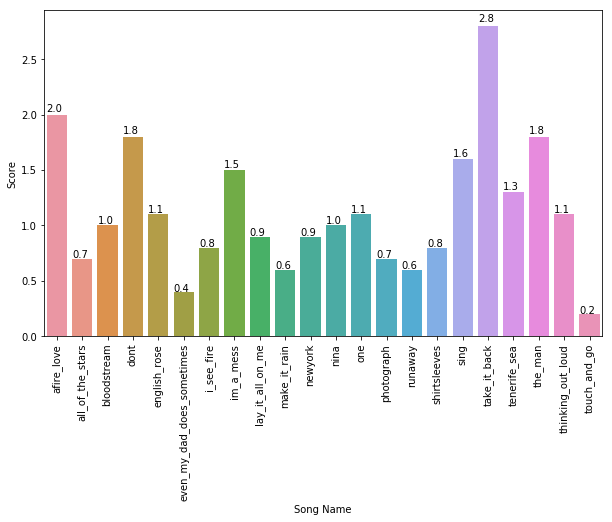

In [15]:
plt.figure(figsize=(10, 6))
palette = sns.set_palette('husl')
df.magnitudes = df.magnitudes.round(2)
g = sns.barplot(x='songs', y='magnitudes', data=df, palette=palette);
g.set_xticklabels(g.get_xticklabels(), rotation=90);
g.set(xlabel='Song Name', ylabel='Score')
for p in g.patches:
    g.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.015));
plt.show()